In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import gdown
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import string

In [5]:

url = 'https://drive.google.com/uc?id=1nONpng5xOXNr2kK-bdtLL4RsaingezVK'  
dataset = 'Reviews.csv'

# Descargar el archivo CSV
gdown.download(url, dataset, quiet=False)

In [6]:
df = pd.read_csv(dataset)

df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
#Variales importantes serán Text, Summary y Score
#crearemos el contador de registros para Score

score_counts = df['Score'].value_counts().sort_index()
score_counts.head()

Score
1     52268
2     29769
3     42640
4     80655
5    363122
Name: count, dtype: int64

Text(0, 0.5, 'Count')

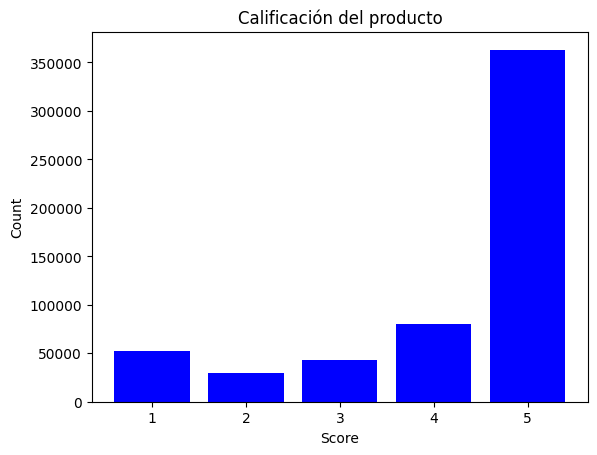

In [12]:
#Gráfico de barras para determinar la mayoría de ratings

plt.bar(score_counts.index, score_counts.values, color='blue')
plt.title('Calificación del producto')
plt.xlabel('Score')
plt.ylabel('Count')

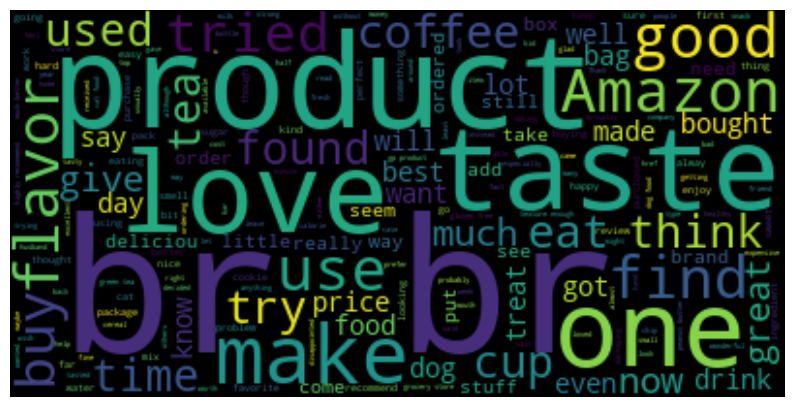

In [32]:
#Generación del WordCloud con la mayor frecuencia de palabras en las reseñas de los productos

wordcloud = WordCloud().generate(' '.join(df['Text']))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
#Proceso de clasificación de scores en nueva columna de sentimiento

#el primer paso es remover las opniniones neutrales
df_filtered = df[df['Score'] != 3]

#creación de la columna sentimiento
df_filtered['sentiment'] = df_filtered['Score'].apply(lambda x: +1 if x > 3 else -1)

df_filtered.head()

C:\Users\swamt\AppData\Local\Temp\ipykernel_18380\4057443784.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sentiment'] = df_filtered['Score'].apply(lambda x: +1 if x > 3 else -1)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,-1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


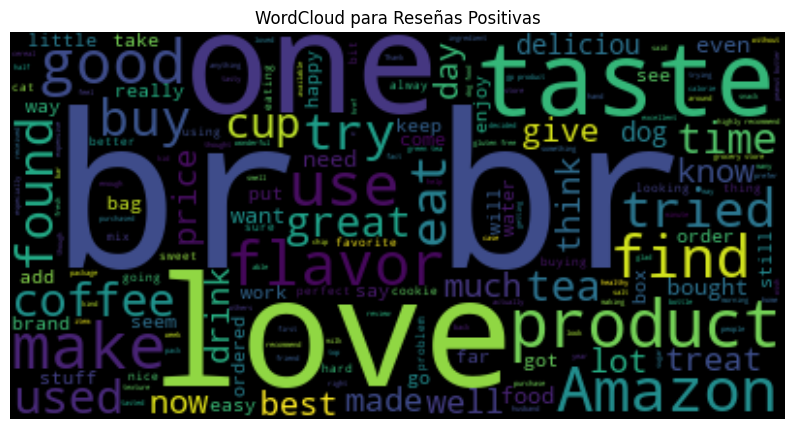

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,1
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,1
...,...,...,...,...,...,...,...,...,...,...,...
568448,568449,B001EO7N10,A1F6BHEYB7R6R7,James Braley,0,0,5,1308096000,Very large ground spice jars.,My only complaint is that there's so much of i...,1
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,1
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,1


In [48]:
#Proceso de Wordclouds segmentados en dependencia de la negatividad o positividad de la reseña

def positive_wordcloud(df, col, sentiment_col):
    #generamos el dataframe positivo
    df_positive = df[df[sentiment_col] == 1]

    #le pasamos el texto de la reseña a cada wordcloud
    positive_txt = ' '.join(df_positive[col].dropna().astype(str))
    positive_wordcloud = WordCloud().generate(positive_txt)

    #imprimimos wordcloud positivo
    plt.figure(figsize=(10, 8))
    plt.imshow(positive_wordcloud, interpolation='bilinear')
    plt.title('WordCloud para Reseñas Positivas')
    plt.axis('off')

    plt.show()
    return df_positive
    
positive_wordcloud(df_filtered,'Text','sentiment')

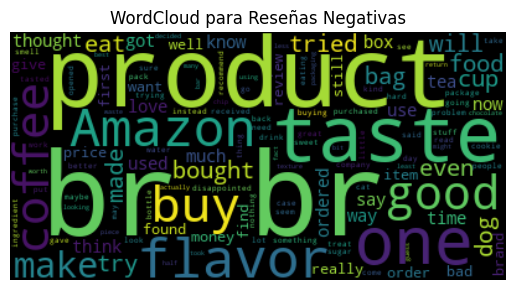

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,-1
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,-1
16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...,-1
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",-1
...,...,...,...,...,...,...,...,...,...,...,...
568433,568434,B003XUL27E,A1JUG9WCN1A52Z,maudlin666,0,0,1,1311638400,Tastes horrible!,I just bought this soup today at my local groc...,-1
568434,568435,B003XUL27E,ABGQPE97ZVYJ3,Katherine Kelly,0,0,2,1306368000,Not so good,This soup is mostly broth. Although it has a k...,-1
568435,568436,B003XUL27E,A2PSB4WQHH46HN,carlyowu,0,2,2,1285718400,Where's the tortellini?,"It is mostly broth, with the advertised 3/4 cu...",-1
568446,568447,B001EO7N10,A2P9W8T7NTLG2Z,Andy,0,0,2,1328918400,Mixed wrong,I had ordered some of these a few months back ...,-1


In [49]:
def negative_wordcloud(df, col, sentiment_col):
    #generamos el dataframe negativo
    df_negative = df[df[sentiment_col] == -1]

    #le pasamos el texto de la reseña a cada wordcloud
    negative_txt = ' '.join(df_negative[col].dropna().astype(str))
    negative_wordcloud = WordCloud().generate(negative_txt)

    #imprimimos wordcloud negativo
    plt.imshow(negative_wordcloud, interpolation='bilinear')
    plt.title('WordCloud para Reseñas Negativas')
    plt.axis('off')
    plt.show()
    return df_negative

negative_wordcloud(df_filtered,'Text','sentiment')

([<matplotlib.axis.XTick at 0x51306ed0>,
 [Text(-1, 0, 'Negativo'), Text(1, 0, 'Positivo')])

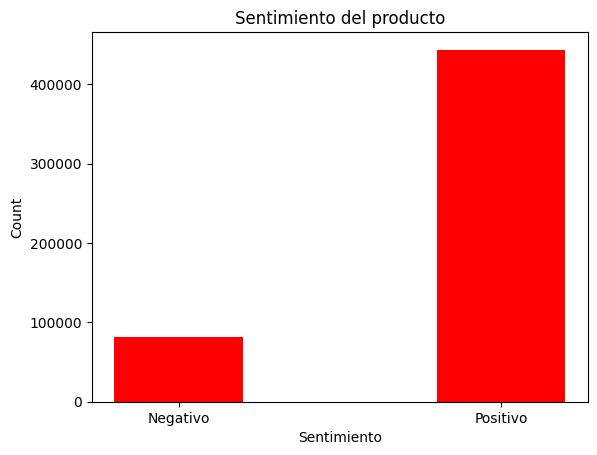

In [51]:
sentiment_counts = df_filtered['sentiment'].value_counts().sort_index()
sentiment_counts.head()

#Gráfico de barras para determinar la mayoría de ratings

plt.bar(sentiment_counts.index, sentiment_counts.values, color='red')
plt.title('Sentimiento del producto')
plt.xlabel('Sentimiento')
plt.ylabel('Count')
plt.xticks(ticks=[-1, 1], labels=['Negativo', 'Positivo'])

In [8]:
#Separación del dataframe en un nuevo set de datos únicamente con summary y sentiment

df_cleaned = df_filtered[['Summary', 'sentiment']].copy()
df_cleaned.head()

,Summary,sentiment
0,Good Quality Dog Food,1
1,Not as Advertised,-1
2,"""Delight"" says it all",1
3,Cough Medicine,-1
4,Great taffy,1


Creación de Dataframe para entrenamiento y pruebas

In [18]:
df_cleaned['cleaned_summary'] = df['Summary'].astype(str).apply(lambda x: x.lower().translate(str.maketrans('', '', string.punctuation)))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_cleaned['cleaned_summary'], df_cleaned['sentiment'], 
                                                    test_size=0.2, random_state=42)

print(f"Entrenamiento: {len(X_train)} registros, Prueba: {len(X_test)} registros")

Entrenamiento: 420651 registros, Prueba: 105163 registros


In [21]:
#Creación de Countvectorizer para la bolsa de palabras
vectorizer = CountVectorizer()

#Transformación de datos mediante el vectorizador para los datos de entrenamiento
X_train_bag_vectorized = vectorizer.fit_transform(X_train)

#Transformación de datos mediante el vectorizador para los datos de entrenamiento
X_test_bag_vectorized = vectorizer.transform(X_test)

Creación de bolsa de Vocabulario en base de la limpieza de reseñas

In [ ]:
#No muestro output porque es enorme
print(f'bolsa de Vocabulario\n\n: {vectorizer.vocabulary_}')

In [31]:
#Creación de modelo de regresión
model = LogisticRegression()

#Ajuste de modelo con datos de entrenamiento
model.fit(X_train_bag_vectorized, y_train)

#Usamos los datos de prueba para las primeras predicciones
test_data_prediction = model.predict(X_test_bag_vectorized)

print(f"Primeras 5 predicciones: {test_data_prediction[:5]}")

#Para ver la precisión del modelo
model_accuracy = accuracy_score(y_test, test_data_prediction)
print(f"Precisión del modelo: {model_accuracy* 100:.2f}%")

Primeras 5 predicciones: [1 1 1 1 1]
Precisión del modelo: 92.63%


Testeo final del modelo por medio de la matriz de confusión y el reporte clasificatorio

In [34]:
matrix = confusion_matrix(y_test ,test_data_prediction)
print("Matriz de confusión: \n\n")
print(matrix)

Matriz de confusión: 


[[10847  5532]
 [ 2217 86567]]


In [35]:
report = classification_report(y_test, test_data_prediction)
print("Reporte clasificativo: \n\n")
print(report)

Reporte clasificativo: 


              precision    recall  f1-score   support

          -1       0.83      0.66      0.74     16379
           1       0.94      0.98      0.96     88784

    accuracy                           0.93    105163
   macro avg       0.89      0.82      0.85    105163
weighted avg       0.92      0.93      0.92    105163

